In [1]:
import networkx as nx
import pandas as pd
import ast 
import matplotlib.pyplot as plt
from community import community_louvain
from netgraph import Graph
import os
# import netgraph

# Model level evaluation

In [2]:
matches = pd.read_csv("struct_matchings_list.csv")
matches

model_A  \
0            ('AERIS', 'spatialExtents.area.altitude')   
1       ('AERIS', 'spatialExtents.area.eastLongitude')   
2       ('AERIS', 'spatialExtents.area.eastLongitude')   
3    ('ISO19115', 'MD_Metadata.identificationInfo.M...   
4            ('AERIS', 'spatialExtents.area.latitude')   
..                                                 ...   
224    ('PREMIS', 'premis.object.originalName.@value')   
225    ('PREMIS', 'premis.object.originalName.@value')   
226      ('SDMX', 'data.structures.annotations.title')   
227      ('SDMX', 'data.structures.annotations.title')   
228          ('SensorML', 'SimpleProcess.name.@value')   

                                               model_B  
0    ('EngMeta', 'dataset.system.grid.point.positio...  
1    ('ISO19115', 'MD_Metadata.identificationInfo.M...  
2    ('DataCite', 'resource.geoLocations.geoLocatio...  
3    ('DataCite', 'resource.geoLocations.geoLocatio...  
4                    ('DarwinCore', 'decimalLatitude')  
..                                                 ...  
224          ('SensorML', 'SimpleProcess.name.@value')  
225  ('TEI', 'TEI.teiHeader.fileDesc.titleStmt.titl...  
226          ('SensorML', 'SimpleProcess.name.@value')  
227  ('TEI', 'TEI.teiHeader.fileDesc.titleStmt.titl...  
228  ('TEI', 'TEI.teiHeader.fileDesc.titleStmt.titl...  

[229 rows x 2 columns]

In [3]:
list_couple_models = []
list_models = []

for row in matches.iloc:
    list_couple_models.append((ast.literal_eval(row["model_A"])[0],ast.literal_eval(row["model_B"])[0]))
    list_models.append(ast.literal_eval(row["model_A"])[0])    
    list_models.append(ast.literal_eval(row["model_B"])[0])
list_models = set(list_models)
list_couple_models = list(set([tuple(sorted(x)) for x in list_couple_models]))

# Figure has been recomputed; that's why this one in a little bit different of the one in the paper

0.9117647058823529


/home/vdang/PycharmProjects/EDBT_paper/venv/lib/python3.8/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


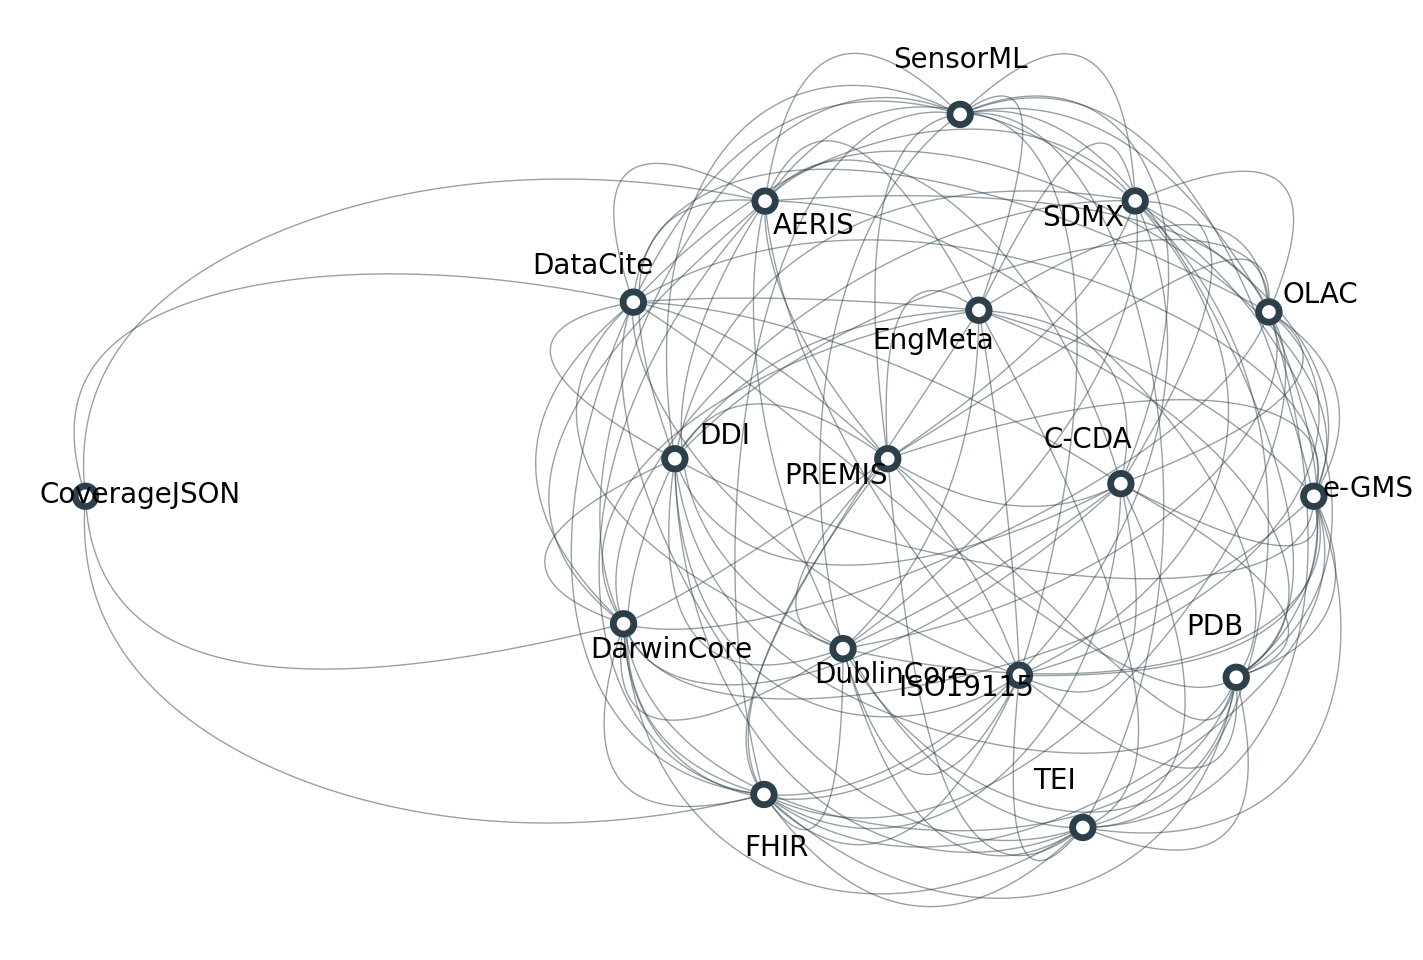

In [4]:


G = nx.Graph()

for i in list_models:
    G.add_node(i, color="green")
G.add_edges_from(list_couple_models)


print(nx.density(G))
# installation easiest via pip:
# pip install netgraph
fig = plt.figure(figsize=(18,18))
# create a modular graph
partition_sizes = [10, 20, 30, 40]
# g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)
g=G
# since we created the graph, we know the best partition:
# node_to_community = dict()
# node = 0
# for community_id, size in enumerate(partition_sizes):
#     for _ in range(size):
#         node_to_community[node] = community_id
#         node += 1
node_to_community = community_louvain.best_partition(G)

# # alternatively, we can infer the best partition using Louvain:
# from community import community_louvain
# node_to_community = community_louvain.best_partition(g)
res = {}
for i in node_to_community:
    if node_to_community[i] in res :
        res[node_to_community[i]] += 1
    else:
        res[node_to_community[i]] = 1

communities_unique = []
for key in res :
    if res[key]!=1:
        communities_unique.append(key)


for i in node_to_community:
    if node_to_community[i] not in communities_unique:
        node_to_community[i]=7

# node_to_community
# print(communities_unique)

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:purple',
    5 : 'tab:brown',
    6 : 'tab:pink',
    7 : 'tab:gray',
    8 : 'tab:olive',
    9 : 'tab:cyan'
}
aux = {key : index for index,key in enumerate(communities_unique) }
node_color = { node :(community_to_color[aux[community_id]] if community_id in communities_unique else community_to_color[7]) for node, community_id in node_to_community.items() }
# node_color = {node:    }

#
# Graph(g,
#       node_color=node_color, node_edge_width=0, edge_alpha=0.1,
#         node_layout="community", node_layout_kwargs=dict(node_to_community=node_to_community),
#       edge_layout='bundled', node_size=1
# )

# netgraph.ArcDiagram(g,edge_width=1)
Graph(g,
       edge_width=0.1, node_labels=True, node_label_fontdict={"size":20}, node_label_offset=0.04,
        node_layout="spring", node_size=1, edge_layout="curved"
)
plt.savefig("models_interoperation_expe.pdf")
plt.show()

# Key level of inspection

In [3]:
 
matches_couple = []
for row in matches.iloc:
    matches_couple.append((ast.literal_eval(row["model_A"])[1],ast.literal_eval(row["model_B"])[1]))    


1.0441491906942007e-05


/home/vdang/PycharmProjects/EDBT_paper/venv/lib/python3.8/site-packages/netgraph/_node_layout.py:1023: RuntimeWarning: invalid value encountered in divide
  directions = deltas / magnitudes[:, np.newaxis]
/home/vdang/PycharmProjects/EDBT_paper/venv/lib/python3.8/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


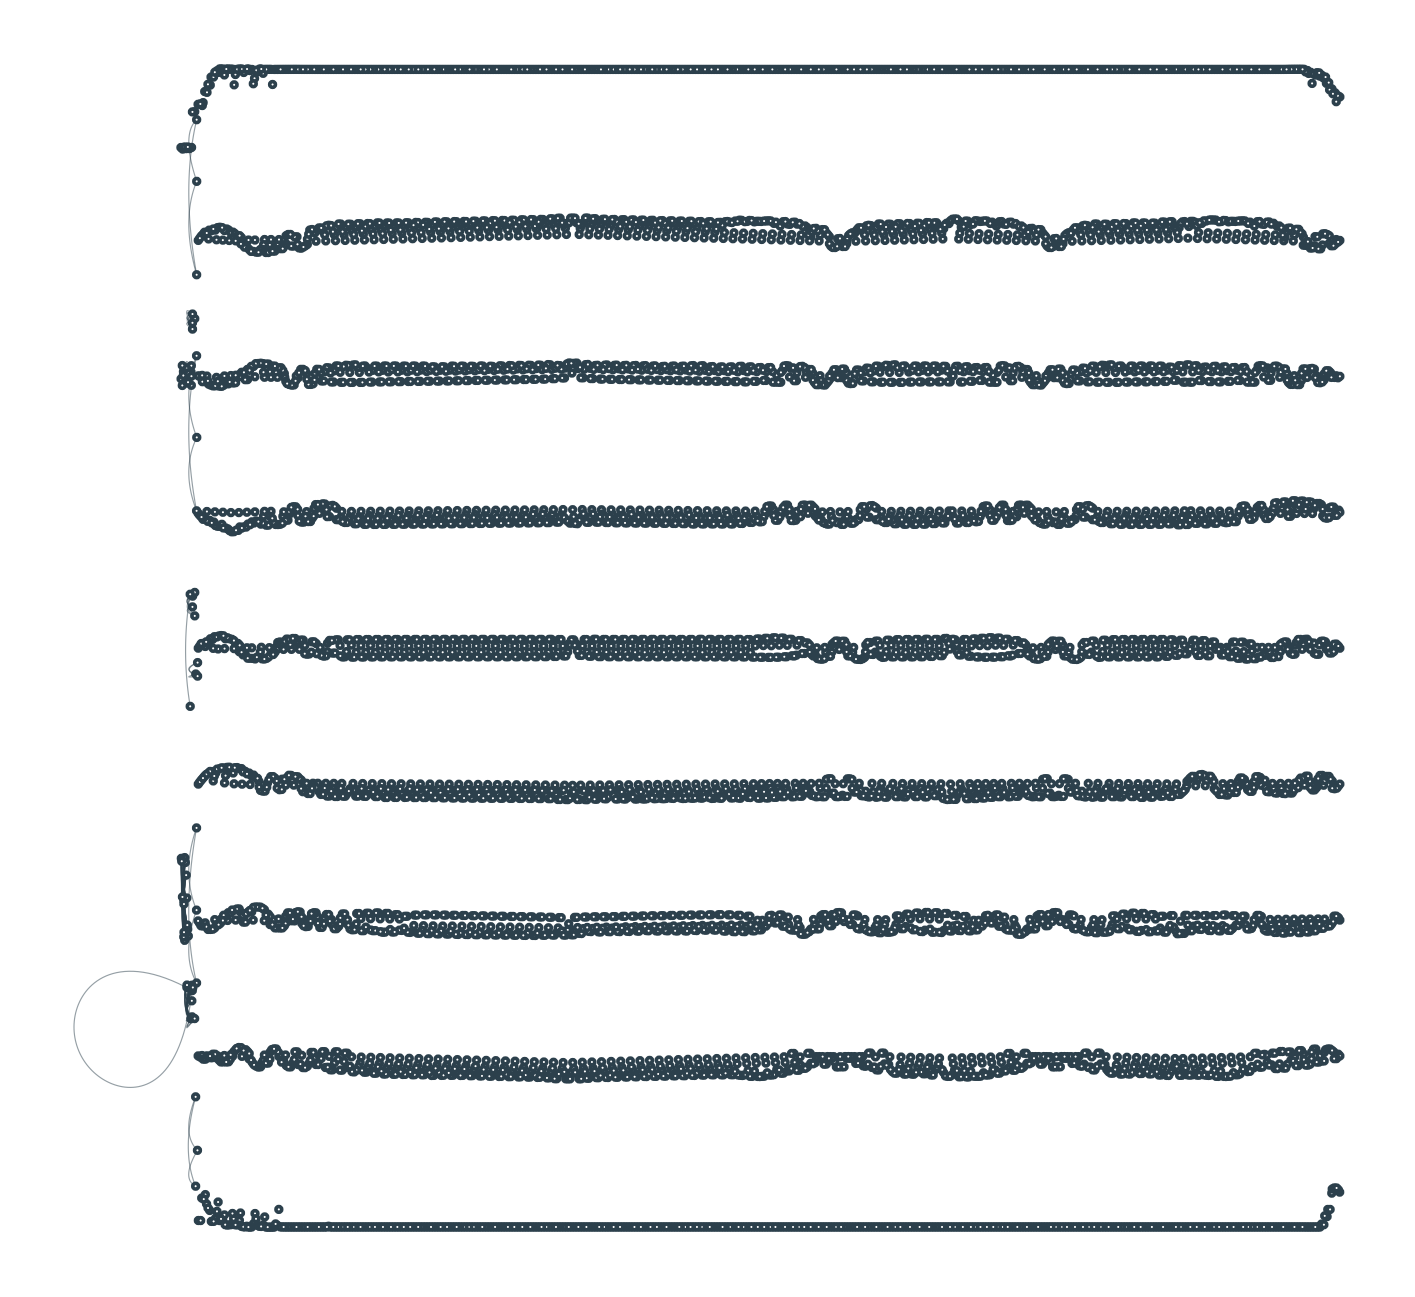

In [6]:


G = nx.Graph()


model_color = {
    0 : '#f44336',
    1 : '#e81e63',
    2 : '#9c27b0',
    3 : '#673ab7',
    4 : '#3f51b5',
    5 : '#2196f3',
    6 : '#03a9f4',
    7 : '#00bcd4',
    8 : '#009688',
    9 : '#4caf50',
    10: '#7d9632',
    11: '#8bc34a',
    12: '#cddc39',
    13: '#ffeb3b',
    14: '#ffc107',
    15: '#ff9800',
    16: '#ff5722',
}
for index,file in enumerate([x for x in os.listdir("models/struct/") if x.endswith(".csv")]):
    
    # print(file,index)
    # print()
    for key in pd.read_csv("models/struct/"+file)["Unnamed: 0"]: 
        G.add_node(key, color=model_color[index])
    
G.add_edges_from(matches_couple)



print(nx.density(G))
# installation easiest via pip:
# pip install netgraph
fig = plt.figure(figsize=(18,18))
# create a modular graph
partition_sizes = [10, 20, 30, 40]
# g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)
g=G
# since we created the graph, we know the best partition:
# node_to_community = dict()
# node = 0
# for community_id, size in enumerate(partition_sizes):
#     for _ in range(size):
#         node_to_community[node] = community_id
#         node += 1
# node_to_community = community_louvain.best_partition(G)
# 
# # # alternatively, we can infer the best partition using Louvain:
# # from community import community_louvain
# # node_to_community = community_louvain.best_partition(g)
# res = {}
# for i in node_to_community:
#     if node_to_community[i] in res :
#         res[node_to_community[i]] += 1
#     else:
#         res[node_to_community[i]] = 1
# 
# communities_unique = []
# for key in res :
#     if res[key]!=1:
#         communities_unique.append(key)
# 
# 
# for i in node_to_community:
#     if node_to_community[i] not in communities_unique:
#         node_to_community[i]=7

Graph(g,
       edge_width=0.1, node_size=0.1, edge_layout="curved"
)
plt.savefig("keys_interoperation_expe.pdf")
plt.show()

DublinCore_model.csv 0
PREMIS_model.csv 1
DarwinCore_model.csv 2
C-CDA_model.csv 3
FHIR_model.csv 4
EngMeta_model.csv 5
CoverageJSON_model.csv 6
ISO19115_model.csv 7
PDB_model.csv 8
DataCite_model.csv 9
TEI_model.csv 10
SensorML_model.csv 11
OLAC_model.csv 12
DDI_model.csv 13
e-GMS_model.csv 14
AERIS_model.csv 15
SDMX_model.csv 16
1.0441491906942007e-05


/home/vdang/PycharmProjects/EDBT_paper/venv/lib/python3.8/site-packages/netgraph/_node_layout.py:1023: RuntimeWarning: invalid value encountered in divide
  directions = deltas / magnitudes[:, np.newaxis]
/home/vdang/PycharmProjects/EDBT_paper/venv/lib/python3.8/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


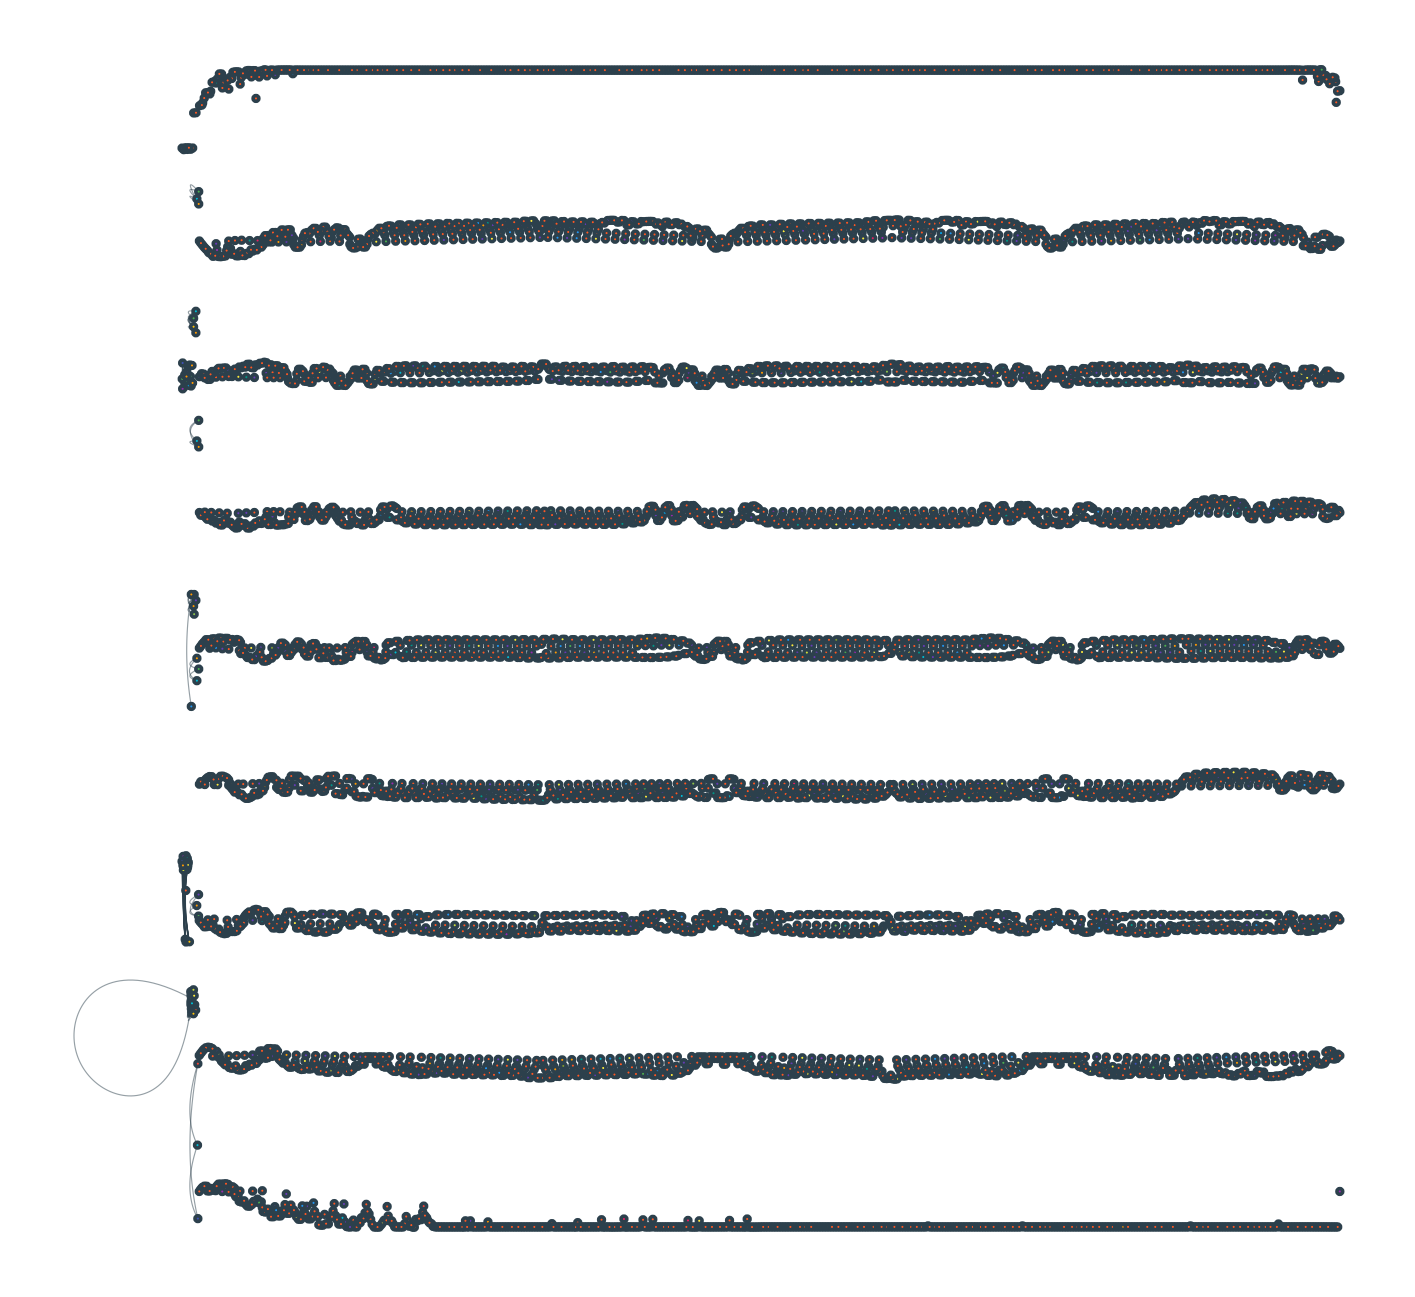

In [9]:


G = nx.Graph()


model_color = {
    0 : '#f44336',
    1 : '#e81e63',
    2 : '#9c27b0',
    3 : '#673ab7',
    4 : '#3f51b5',
    5 : '#2196f3',
    6 : '#03a9f4',
    7 : '#00bcd4',
    8 : '#009688',
    9 : '#4caf50',
    10: '#7d9632',
    11: '#8bc34a',
    12: '#cddc39',
    13: '#ffeb3b',
    14: '#ffc107',
    15: '#ff9800',
    16: '#ff5722',
}
colors_oui = {}

for index,file in enumerate([x for x in os.listdir("models/struct/") if x.endswith(".csv")]):
    print(file,index)
        
    for key in pd.read_csv("models/struct/"+file)["Unnamed: 0"]: 
        G.add_node(key, color=model_color[index])
        colors_oui[key] = "blue"
        
# Not added in the loop, not clue why so added manually to make it works
colors_oui["Language"]=model_color[14]
colors_oui["Creator"]=model_color[14]
colors_oui["Title"]=model_color[14]
        
G.add_edges_from(matches_couple)



print(nx.density(G))
fig = plt.figure(figsize=(18,18))
# create a modular graph
partition_sizes = [10, 20, 30, 40]
# g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)
g=G
# since we created the graph, we know the best partition:
# node_to_community = dict()
# node = 0
# for community_id, size in enumerate(partition_sizes):
#     for _ in range(size):
#         node_to_community[node] = community_id
#         node += 1
# node_to_community = community_louvain.best_partition(G)
# 
# # # alternatively, we can infer the best partition using Louvain:
# # from community import community_louvain
# # node_to_community = community_louvain.best_partition(g)
# res = {}
# for i in node_to_community:
#     if node_to_community[i] in res :
#         res[node_to_community[i]] += 1
#     else:
#         res[node_to_community[i]] = 1
# 
# communities_unique = []
# for key in res :
#     if res[key]!=1:
#         communities_unique.append(key)
# 
# 
# for i in node_to_community:
#     if node_to_community[i] not in communities_unique:
#         node_to_community[i]=7

Graph(g, node_color= colors_oui,
       edge_width=0.1, node_size=0.1, edge_layout="curved"
)
plt.savefig("keys_interoperation_expe_2.pdf")
plt.show()

In [25]:


G = nx.Graph()


model_color = {
    0 : '#f44336',
    1 : '#e81e63',
    2 : '#9c27b0',
    3 : '#673ab7',
    4 : '#3f51b5',
    5 : '#2196f3',
    6 : '#03a9f4',
    7 : '#00bcd4',
    8 : '#009688',
    9 : '#4caf50',
    10: '#7d9632',
    11: '#8bc34a',
    12: '#cddc39',
    13: '#ffeb3b',
    14: '#ffc107',
    15: '#ff9800',
    16: '#ff5722',
}
colors_oui = {}
node_community = {}
for index,file in enumerate([x for x in os.listdir("models/struct/") if x.endswith(".csv")]):
    # print(file,index)
        
    for key in pd.read_csv("models/struct/"+file)["Unnamed: 0"]: 
        G.add_node(key, color=model_color[index])
        colors_oui[key] = model_color[index]
        node_community[key]=index
# Not added in the loop, not clue why so added manually to make it work
colors_oui["Language"]=model_color[14]
colors_oui["Creator"]=model_color[14]
colors_oui["Title"]=model_color[14]
node_community["Language"]=14
node_community["Creator"]=14
node_community["Title"]=14
G.add_edges_from(matches_couple)


print("Key graph density : ")
print(nx.density(G))
print("Number of connected component :")
print(len([x for x in list((nx.connected_components(G))) if len(x)>2 ]))
print("Number of nodes in a connected component :")
print(sum([len(x) for x in list((nx.connected_components(G))) if len(x)>2 ]))
print("Number of node in graph :")
print(len(G.nodes))


Key graph density : 
1.0441491906942007e-05
Number of connected component :
12
Number of nodes in a connected component :
64
Number of node in graph :
6492


# Simulation scale-free network

In [146]:
import random
import sys 
import math
import copy
list_node = {"1":['2','3','4'],"2":['1','3','4'],"3":['1','2','4'],"4":['1','2','3']}


def preferentiel_attachment(graph):
    aux = []
    for nodes in graph :
        aux+= [nodes for _ in range(len(graph[nodes]))]
    
    return aux[random.randint(0,len(aux)-1)]

print(preferentiel_attachment(list_node))


def get_node_nearest_from_distribution(graph,registering_node):
    '''
    Calcul of best node to link to based on actual distribution of degree
    :param node:
    :return:
    '''

    gamma = 2.5
    node_degree = 2
    value_divkb = sys.float_info.max
    node_number = len(graph)
    max_degree = 0
    for node in graph :
        if len(graph[node]) > max_degree:
            max_degree=len(graph[node])
    # Min deg = 2 -> 0 is index for degree 2 in network
    degree_distrib = [[] for _ in range(max([len(graph[x]) for x in graph]))]
    for node in graph:
        # print(len())
        degree_distrib[len(graph[node])-2].append(node)
    for index in range(len(degree_distrib) - 1):
        # If no node of degree X, it's not possible to connect a node to it
        if len(degree_distrib[index]) > 0:

            degree = index + 2

            pn = ((len(degree_distrib[index])) - 1) / node_number
            pn_one = ((len(degree_distrib[index + 1])) + 1) / node_number

            # based on the lim x log(x) = 0 for x -> 0
            if pn == 0:
                part_one = 0
            else:
                part_one = pn * math.log(pn / degree ** gamma)
            if pn_one == 0:
                part_two = 0
            else:
                part_two = pn_one * math.log(pn_one / (degree + 1) ** gamma)
            if part_one + part_two < value_divkb :
                aux = copy.deepcopy(degree_distrib[degree -2])
                for node in graph[registering_node]:
                    try : 
                        aux.remove(node)
                    except:
                        pass
                if len(aux)>0:
                    node_degree = degree
   
    list_of_platform_to_connect_to = degree_distrib[node_degree -2]
    print(node_degree)
    print(list_of_platform_to_connect_to)
    try :
        node_to_connect = list_of_platform_to_connect_to[random.randint(0,len(list_of_platform_to_connect_to)-1)]
    except Exception as e : 
        print(list_of_platform_to_connect_to)
        print(degree_distrib)
        print(node_degree)
        print(graph)
        raise e
    return node_to_connect
# 
def add_node(node,graph, three=False, three_random=False):
    # try :
    node_to_connect = preferentiel_attachment(graph)
    
    graph[node]=[node_to_connect]
    graph[node_to_connect].append(node)
    new_node = get_node_nearest_from_distribution(graph,node)
    graph[node].append(new_node)
    graph[new_node].append(node)
    if three:
        new_node = get_node_nearest_from_distribution(graph,node)
        graph[node].append(new_node)
        graph[new_node].append(node)
    if three_random:
        aux = node
        while(aux == node or aux in graph[node] ):
            aux = list(graph.keys())[random.randint(0,len(list(graph.keys()))-1)]
            
        graph[node].append(aux)
        graph[aux].append(node)
    # except Exception as e :
    #     print("node : ",node)
    #     print(graph)
    #     print(node_to_connect)
    #     raise e
    return graph

for i in range(5,300):
    add_node(str(i),list_node)
print(list_node)

2
3
['1', '2', '4']
4
['1', '2', '3']
5
['2', '3']
5
['3']
7
['2']
8
['2']
9
['2']
10
['2']
11
['2']
12
['2']
13
['2']
14
['2']
15
['2']
16
['2']
17
['2']
18
['2']
7
['3']
20
['2']
21
['2']
22
['2']
23
['2']
24
['2']
25
['2']
26
['2']
27
['2']
28
['2']
9
['3']
10
['3']
31
['2']
32
['2']
11
['3']
34
['2']
35
['2']
36
['2']
37
['2']
13
['3']
39
['2']
40
['2']
41
['2']
42
['2']
43
['2']
44
['2']
45
['2']
46
['2']
47
['2']
48
['2']
49
['2']
50
['2']
51
['2']
52
['2']
53
['2']
54
['2']
55
['2']
14
['3']
57
['2']
15
['3']
59
['2']
60
['2']
61
['2']
62
['2']
63
['2']
16
['3']
17
['3']
66
['2']
67
['2']
68
['2']
69
['2']
70
['2']
71
['2']
72
['2']
73
['2']
74
['2']
75
['2']
76
['2']
77
['2']
20
['3']
79
['2']
80
['2']
81
['2']
82
['2']
83
['2']
84
['2']
21
['3']
86
['2']
87
['2']
88
['2']
22
['3']
90
['2']
23
['3']
92
['2']
93
['2']
94
['2']
95
['2']
96
['2']
24
['3']
25
['3']
26
['3']
100
['2']
101
['2']
102
['2']
103
['2']
104
['2']
28
['3']
106
['2']
107
['2']
29
['3']
109
['2']
30
['3']
11

In [147]:
print(max([len(list_node[x]) for x in list_node]))

298


# 2 minimum nodes links 

0.013355480236133869


/home/vdang/PycharmProjects/EDBT_paper/venv/lib/python3.8/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


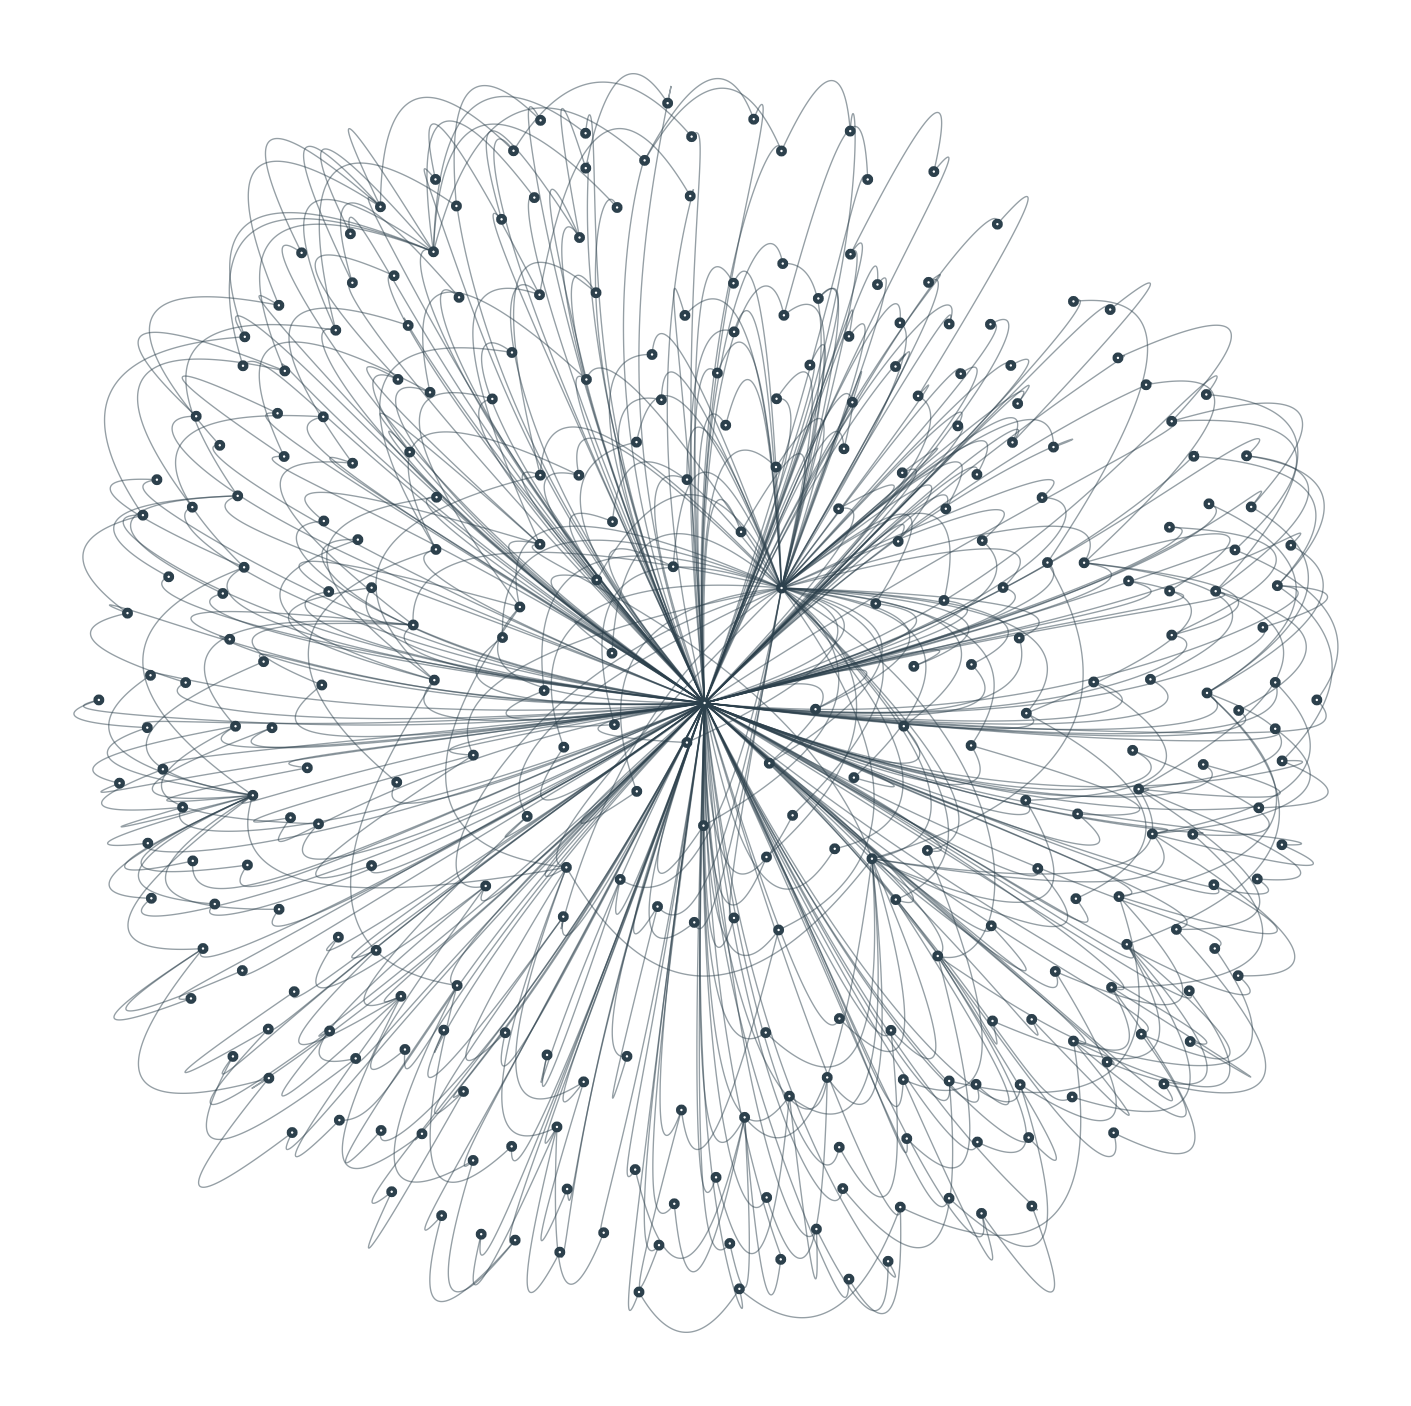

In [148]:
edges_sfnet = []
for node in list_node:
    for node_to in list_node[node]:
        edges_sfnet.append((node,node_to))

edges_set_sfnet = list(set([tuple(sorted(x)) for x in edges_sfnet]))





G = nx.Graph()

for i in list_node:
    G.add_node(i, color="green")
G.add_edges_from(edges_set_sfnet)


print(nx.density(G))
# installation easiest via pip:
# pip install netgraph
fig = plt.figure(figsize=(18,18))
# create a modular graph
partition_sizes = [10, 20, 30, 40]
# g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)
g=G
# since we created the graph, we know the best partition:
# node_to_community = dict()
# node = 0
# for community_id, size in enumerate(partition_sizes):
#     for _ in range(size):
#         node_to_community[node] = community_id
#         node += 1
node_to_community = community_louvain.best_partition(G)

# # alternatively, we can infer the best partition using Louvain:
# from community import community_louvain
# node_to_community = community_louvain.best_partition(g)
res = {}
for i in node_to_community:
    if node_to_community[i] in res :
        res[node_to_community[i]] += 1
    else:
        res[node_to_community[i]] = 1

communities_unique = []
for key in res :
    if res[key]!=1:
        communities_unique.append(key)


for i in node_to_community:
    if node_to_community[i] not in communities_unique:
        node_to_community[i]=7

# node_to_community
# print(communities_unique)

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:purple',
    5 : 'tab:brown',
    6 : 'tab:pink',
    7 : 'tab:gray',
    8 : 'tab:olive',
    9 : 'tab:cyan'
}
# aux = {key : index for index,key in enumerate(communities_unique) }
# node_color = { node :(community_to_color[aux[community_id]] if community_id in communities_unique else community_to_color[7]) for node, community_id in node_to_community.items() }

Graph(g,
       edge_width=0.1,
        node_layout="spring", node_size=0.1, edge_layout="curved"
)
plt.savefig("scale-free_networksimul_2nodes.pdf")
plt.show()

# 3 minimum nodes links 

In [153]:
list_node = {"1":['2','3','4'],"2":['1','3','4'],"3":['1','2','4'],"4":['1','2','3']}

for i in range(5,300):
    add_node(str(i),list_node, three=True)
print(list_node)

3
['1', '2', '4']
3
['2', '4']
4
['2', '3']
4
['2']
5
['1', '2', '3']
5
['1', '3']
6
['2', '3']
6
['2']
7
['3']
5
['1']
8
['3']
6
['1']
9
['2', '3']
9
['3']
10
['2']
8
['1']
11
['2', '3']
11
['3']
12
['2', '3']
12
['3']
13
['3']
9
['1']
14
['2', '3']
14
['3']
15
['2', '3']
15
['2']
16
['2', '3']
16
['2']
17
['2', '3']
17
['2']
18
['2', '3']
18
['2']
19
['2']
11
['1']
20
['2']
12
['1']
21
['2']
13
['1']
22
['3']
14
['1']
23
['2']
15
['1']
24
['2']
16
['1']
25
['2']
17
['1']
26
['2', '3']
26
['2']
27
['2', '3']
27
['2']
28
['2', '3']
28
['2']
29
['2']
18
['1']
30
['2', '3']
30
['3']
31
['2', '3']
31
['3']
32
['2', '3']
32
['3']
33
['2', '3']
33
['2']
34
['2', '3']
34
['2']
35
['2', '3']
35
['2']
36
['2', '3']
36
['2']
37
['2', '3']
37
['3']
38
['2', '3']
38
['2']
39
['2', '3']
39
['3']
40
['2', '3']
40
['3']
41
['2', '3']
41
['2']
42
['2', '3']
42
['3']
43
['2', '3']
43
['3']
44
['2', '3']
44
['2']
45
['2', '3']
45
['3']
46
['2', '3']
46
['2']
47
['2', '3']
47
['2']
48
['2', '3']
48
['3'

0.019999551076294583


/home/vdang/PycharmProjects/EDBT_paper/venv/lib/python3.8/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


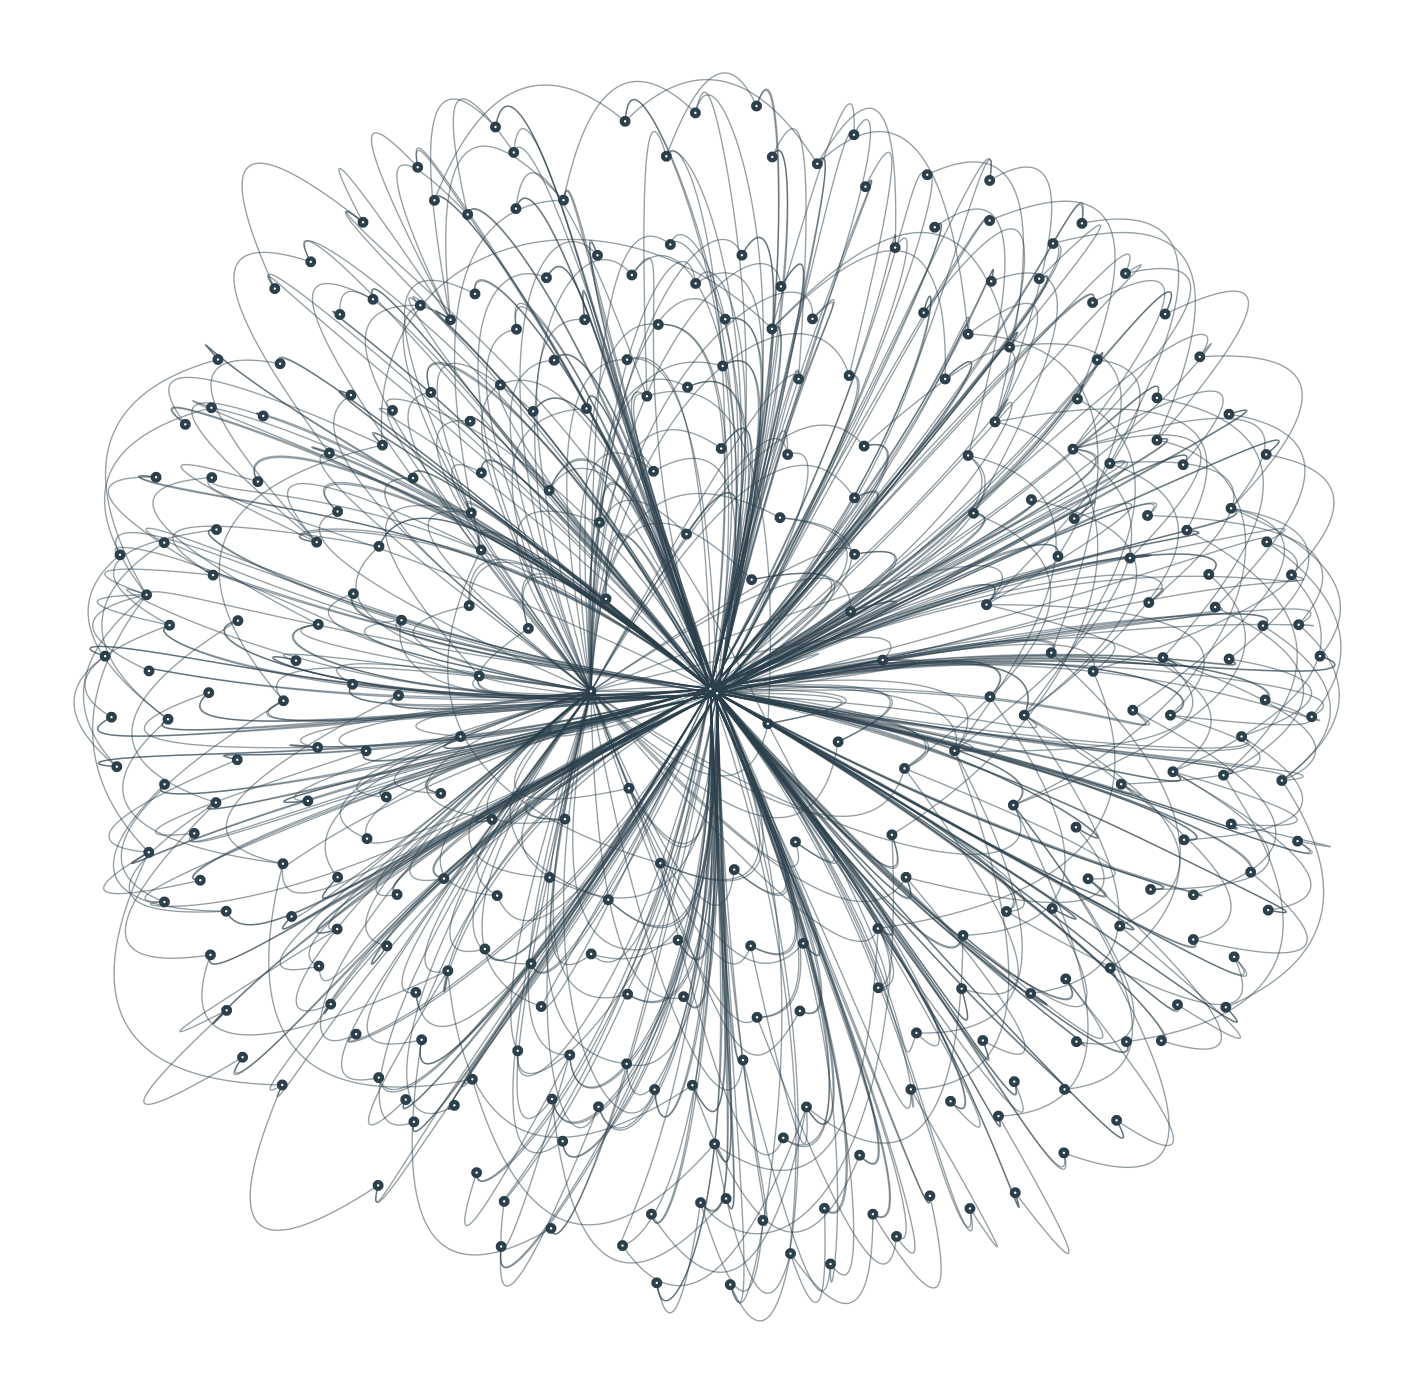

In [154]:
edges_sfnet = []
for node in list_node:
    for node_to in list_node[node]:
        edges_sfnet.append((node,node_to))

edges_set_sfnet = list(set([tuple(sorted(x)) for x in edges_sfnet]))





G = nx.Graph()

for i in list_node:
    G.add_node(i, color="green")
G.add_edges_from(edges_set_sfnet)


print(nx.density(G))
# installation easiest via pip:
# pip install netgraph
fig = plt.figure(figsize=(18,18))
# create a modular graph
partition_sizes = [10, 20, 30, 40]
# g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)
g=G
# since we created the graph, we know the best partition:
# node_to_community = dict()
# node = 0
# for community_id, size in enumerate(partition_sizes):
#     for _ in range(size):
#         node_to_community[node] = community_id
#         node += 1
node_to_community = community_louvain.best_partition(G)

# # alternatively, we can infer the best partition using Louvain:
# from community import community_louvain
# node_to_community = community_louvain.best_partition(g)
res = {}
for i in node_to_community:
    if node_to_community[i] in res :
        res[node_to_community[i]] += 1
    else:
        res[node_to_community[i]] = 1

communities_unique = []
for key in res :
    if res[key]!=1:
        communities_unique.append(key)


for i in node_to_community:
    if node_to_community[i] not in communities_unique:
        node_to_community[i]=7

# node_to_community
# print(communities_unique)

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:purple',
    5 : 'tab:brown',
    6 : 'tab:pink',
    7 : 'tab:gray',
    8 : 'tab:olive',
    9 : 'tab:cyan'
}
# aux = {key : index for index,key in enumerate(communities_unique) }
# node_color = { node :(community_to_color[aux[community_id]] if community_id in communities_unique else community_to_color[7]) for node, community_id in node_to_community.items() }

Graph(g,
       edge_width=0.1,
        node_layout="spring", node_size=0.1, edge_layout="curved"
)
plt.savefig("scale-free_networksimul_3nodes.pdf")
plt.show()

In [155]:
list_node = {"1":['2','3','4'],"2":['1','3','4'],"3":['1','2','4'],"4":['1','2','3']}

for i in range(5,300):
    add_node(str(i),list_node, three_random=True)
print(list_node)

3
['1', '2', '3']
4
['2', '3', '4', '5']
5
['2', '3', '5']
6
['2', '3']
7
['3']
8
['3']
9
['3']
10
['3']
11
['3']
12
['3']
13
['3']
14
['3']
7
['2', '4']
16
['3']
17
['3']
18
['3']
19
['3']
20
['3']
21
['3']
9
['2']
23
['3']
24
['3']
25
['3']
26
['3']
10
['2']
28
['3']
29
['3']
11
['2']
31
['3']
32
['3']
33
['3']
12
['2']
35
['3']
13
['2']
14
['2']
38
['3']
39
['3']
40
['3']
41
['3']
42
['3']
43
['3']
44
['3']
45
['3']
46
['3']
47
['3']
15
['2']
49
['3']
50
['3']
51
['3']
52
['3']
53
['3']
54
['3']
18
['2']
19
['2']
57
['3']
58
['3']
59
['3']
21
['2']
61
['3']
62
['3']
63
['3']
64
['3']
65
['3']
66
['3']
67
['3']
68
['3']
69
['3']
70
['3']
71
['3']
72
['3']
73
['3']
74
['3']
75
['3']
76
['3']
23
['2']
24
['2']
25
['2']
26
['2']
81
['3']
82
['3']
27
['2']
84
['3']
85
['3']
86
['3']
29
['2']
88
['3']
89
['3']
90
['3']
91
['3']
92
['3']
93
['3']
94
['3']
31
['2']
96
['3']
97
['3']
98
['3']
99
['3']
100
['3']
32
['2']
102
['3']
103
['3']
33
['2']
105
['3']
34
['2']
107
['3']
108
['3']
109


0.019999551076294583


/home/vdang/PycharmProjects/EDBT_paper/venv/lib/python3.8/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


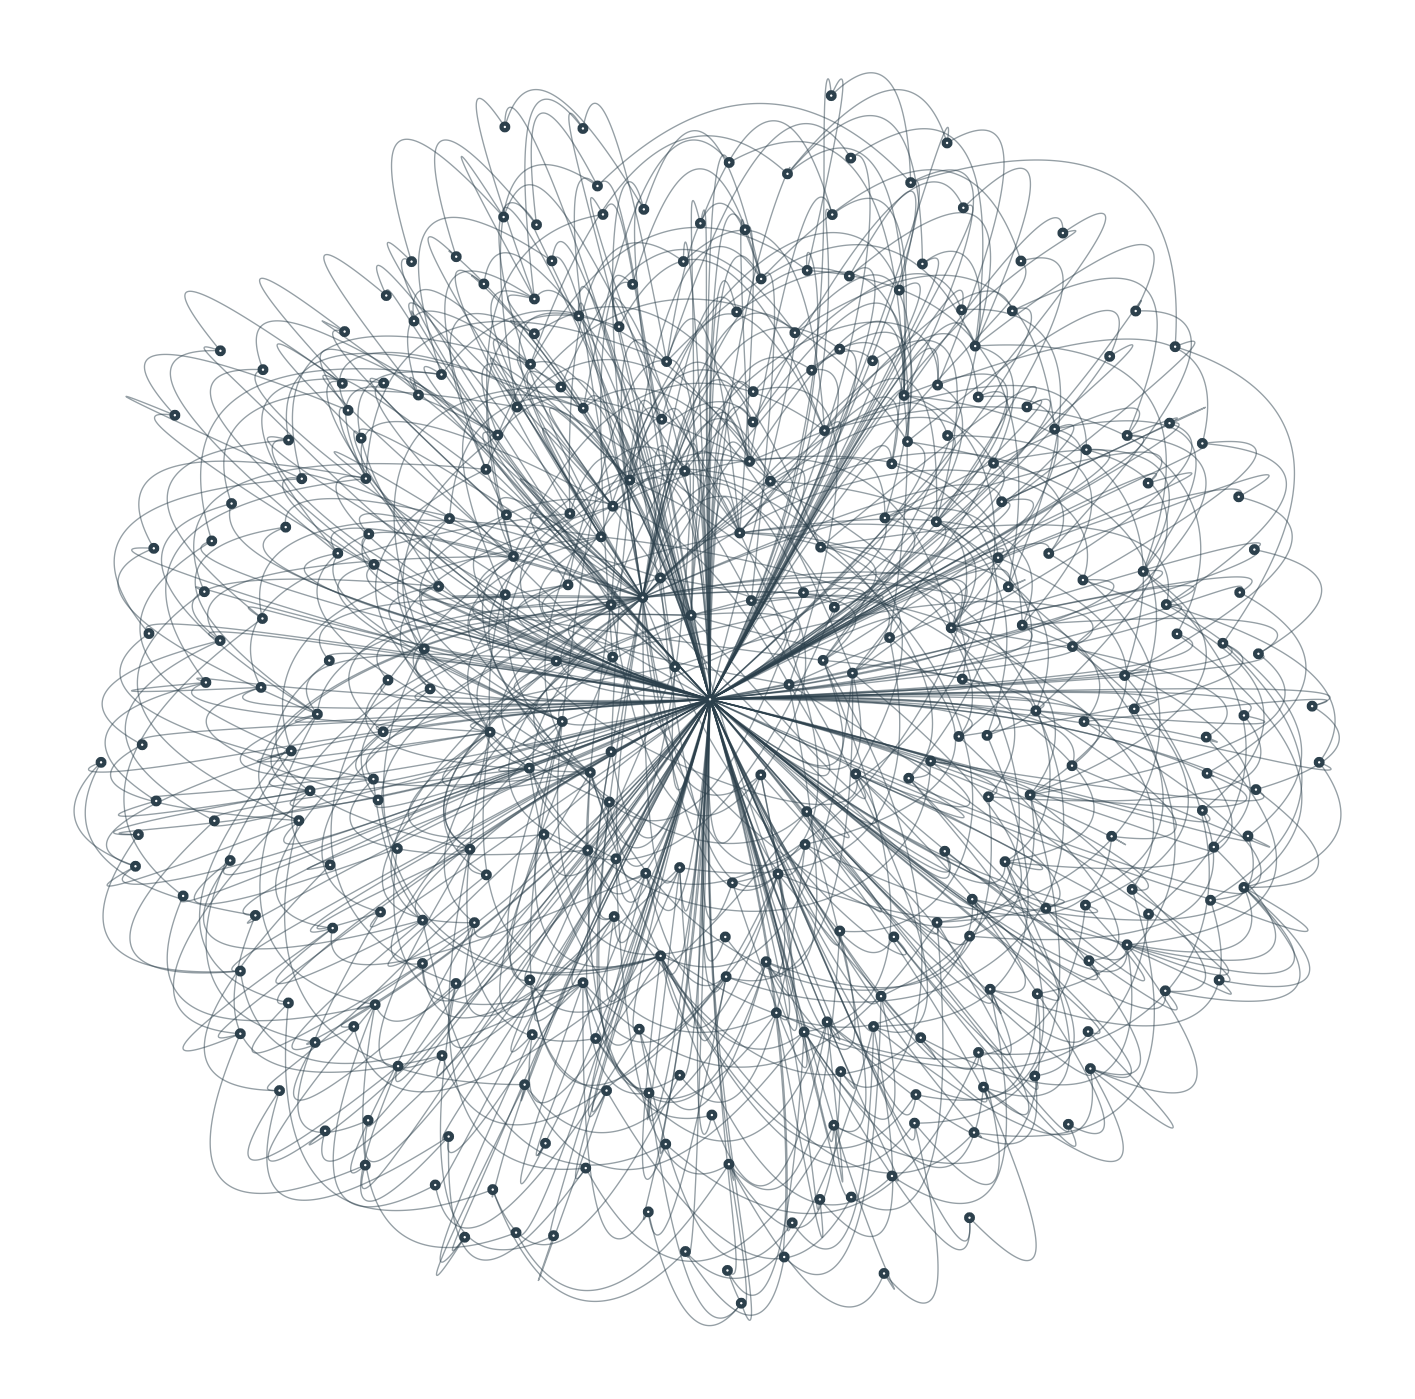

In [156]:
edges_sfnet = []
for node in list_node:
    for node_to in list_node[node]:
        edges_sfnet.append((node,node_to))

edges_set_sfnet = list(set([tuple(sorted(x)) for x in edges_sfnet]))





G = nx.Graph()

for i in list_node:
    G.add_node(i, color="green")
G.add_edges_from(edges_set_sfnet)


print(nx.density(G))
# installation easiest via pip:
# pip install netgraph
fig = plt.figure(figsize=(18,18))
# create a modular graph
partition_sizes = [10, 20, 30, 40]
# g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)
g=G
# since we created the graph, we know the best partition:
# node_to_community = dict()
# node = 0
# for community_id, size in enumerate(partition_sizes):
#     for _ in range(size):
#         node_to_community[node] = community_id
#         node += 1
node_to_community = community_louvain.best_partition(G)

# # alternatively, we can infer the best partition using Louvain:
# from community import community_louvain
# node_to_community = community_louvain.best_partition(g)
res = {}
for i in node_to_community:
    if node_to_community[i] in res :
        res[node_to_community[i]] += 1
    else:
        res[node_to_community[i]] = 1

communities_unique = []
for key in res :
    if res[key]!=1:
        communities_unique.append(key)


for i in node_to_community:
    if node_to_community[i] not in communities_unique:
        node_to_community[i]=7

# node_to_community
# print(communities_unique)

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:purple',
    5 : 'tab:brown',
    6 : 'tab:pink',
    7 : 'tab:gray',
    8 : 'tab:olive',
    9 : 'tab:cyan'
}
# aux = {key : index for index,key in enumerate(communities_unique) }
# node_color = { node :(community_to_color[aux[community_id]] if community_id in communities_unique else community_to_color[7]) for node, community_id in node_to_community.items() }

Graph(g,
       edge_width=0.1,
        node_layout="spring", node_size=0.1, edge_layout="curved"
)
plt.savefig("scale-free_networksimul_3nodes_rand.pdf")
plt.show()

# Models vs platform

In [173]:
import pandas as pd

models_re3data = pd.read_csv("data_selection_cleaned.csv")
filled_models = models_re3data[pd.isna(models_re3data["MD_standards"]).apply(lambda x : not x)]

list_of_models_in_Re3Data =[]
for i in filled_models["MD_standards"].unique():
    list_of_models_in_Re3Data += i.split("#")
    
list_of_models_in_Re3Data = set(list_of_models_in_Re3Data)
print(list_of_models_in_Re3Data)

{'DCAT - Data Catalog Vocabulary', 'PROV', 'Genome Metadata', 'EML - Ecological Metadata Language', 'OAI-ORE - Open Archives Initiative Object Reuse and Exchange', 'International Virtual Observatory Alliance Technical Specifications', 'ISA-Tab', 'MIBBI - Minimum Information for Biological and Biomedical Investigations', 'SDMX - Statistical Data and Metadata Exchange', 'QuDEx - Qualitative Data Exchange Format', 'CIM - Common Information Model', 'CSMD-CCLRC Core Scientific Metadata Model', 'RDF Data Cube Vocabulary', 'DIF - Directory Interchange Format', 'DDI - Data Documentation Initiative', 'MIDAS-Heritage', 'SPASE Data Model', 'CF (Climate and Forecast) Metadata Conventions', 'AVM - Astronomy Visualization Metadata', 'FGDC/CSDGM - Federal Geographic Data Committee Content Standard for Digital Geospatial Metadata', 'DataCite Metadata Schema', 'ABCD - Access to Biological Collection Data', 'Darwin Core', 'CIF - Crystallographic Information Framework', 'Repository-Developed Metadata Sch

In [178]:
# Other models not in Re3Data
models_used = ["DataCite","Dublin Core","DDI", "ISO 19115", "Darwin Core", "SDMX"]
aux = filled_models
plat = []
for i in aux.iloc : 
    # print(i)
    for model in models_used:
        # print(model)
        # print(i)
        if model in i["MD_standards"]:
            
            plat.append(i["name"])
# aux["MD_standards"]
plat = set(plat)
print("Percentage of platform that we interoperate with 6 models")
print(len(plat)/len(filled_models))

Percentage of platform that we interoperate with 6 models
0.728492501973165


In [207]:
675/66480

0.010153429602888087